<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
len(X_train)

60000

In [15]:
len(X_test)

10000

In [16]:
X_train[0].shape

(28, 28)

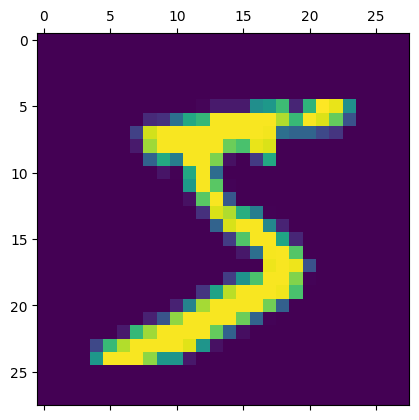

In [17]:
plt.matshow(X_train[0])

In [18]:
y_train[0]

5

In [19]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [21]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 1.2635 - accuracy: 0.6890
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5416 - accuracy: 0.8607
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4094 - accuracy: 0.8889
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3583 - accuracy: 0.8998
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3307 - accuracy: 0.9062


In [23]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [24]:
model.get_weights()

[array([[ 0.07665901,  0.0426061 ,  0.07704775, ..., -0.08165587,
         -0.05128594, -0.03468068],
        [-0.04877211,  0.06467952,  0.07669196, ...,  0.00971626,
         -0.04248777, -0.07677034],
        [ 0.03072032,  0.02785686, -0.04445229, ...,  0.04616687,
          0.00867106, -0.05345874],
        ...,
        [-0.00538634,  0.02758253,  0.07383309, ..., -0.02756879,
         -0.00750885, -0.07983985],
        [-0.01089045,  0.04170059, -0.07195412, ...,  0.02346633,
         -0.06308921, -0.01283377],
        [-0.07872643,  0.06232402, -0.04585042, ..., -0.00768486,
          0.08034168, -0.05997756]], dtype=float32),
 array([ 0.27633622, -0.00879295,  0.17301041, -0.00965752, -0.00843566,
         0.11570058, -0.00809635, -0.00800899,  0.06156439, -0.00824022,
        -0.0085952 ,  0.03946523,  0.20849922, -0.00600228,  0.10989314,
        -0.0031636 ,  0.07140852,  0.09990148,  0.276203  ,  0.0764623 ,
         0.11971296, -0.00948273, -0.00591655,  0.12255673, -0.004